Implementing Neural Network from Scratch

In [2]:
#load both training and testing data
import pandas as pd 
train_data=pd.read_csv(r"E:\Projects\Victor-Files\Digit_recognizer\data\train.csv")
test_data=pd.read_csv(r"E:\Projects\Victor-Files\Digit_recognizer\data\test.csv")

In [1]:
train_data.shape

NameError: name 'train_data' is not defined

In [142]:
#converting data into numpy array
import numpy as np
train_data=np.array(train_data)
test_data=np.array(test_data)

In [143]:
train_data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [144]:
#split training data into validation and training data
m, n =train_data.shape
np.random.shuffle(train_data)

dev_data=train_data[0:1000].T
Y_dev=dev_data[0]
X_dev=dev_data[1:n]

train_data=train_data[1000:m].T
Y_train=train_data[0]
X_train=train_data[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape


In [145]:
def init_params():
    W1=np.random.rand(10,784) - 0.5
    b1=np.random.rand(10,1) - 0.5
    W2=np.random.rand(10,10)- 0.5
    b2=np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2     

In [146]:
def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
  

In [147]:
def feedforward(W1,b1,W2,b2,X):
    Z1=W1.dot(X) + b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1) + b2
    A2=softmax(Z2)
    return Z1, A1, Z2, A2

In [148]:

def onehot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1  # Corrected indexing
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


In [149]:
def deriv_RELU(Z):
    return Z  > 0

In [150]:
def backprop(Z1,A1,Z2,A2,W1,W2,X,Y):
    one_hot_Y=onehot(Y)
    dZ2=A2-one_hot_Y
    dW2=(1/m)* dZ2.dot(A1.T)
    db2=(1/m)* np.sum(dZ2)
    dZ1=W2.T.dot(dZ2) * deriv_RELU(Z1)
    dW1=(1/m) * dZ1.dot(X.T)
    db1=(1/m)*np.sum(dZ1)
    return dW1,db1,dW2,db2
    
    
def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1=W1-alpha * dW1
    b1=b1-alpha * db1
    W2=W2-alpha * dW2
    b2=b2-alpha * db2
    return W1,b1,W2,b2
    
    

In [151]:
def get_predictions(A2):
    return np.argmax(A2,0)
def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions == Y )/ Y.size

In [152]:
def gradient_descent(X,Y,iterations,alpha):
    W1,b1,W2,b2=init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2=feedforward(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2=backprop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i % 50 ==0:
            print("Iteration:",i)
            print("Accuracy:",get_accuracy(get_predictions(A2),Y))
    return W1,b1,W2,b2

In [154]:
W1,b1,W2,b2=gradient_descent(X_train,Y_train,500,0.10)

Iteration: 0
[0 0 6 ... 6 0 1] [2 4 1 ... 0 4 0]
Accuracy: 0.057439024390243905
Iteration: 50
[2 6 3 ... 0 8 0] [2 4 1 ... 0 4 0]
Accuracy: 0.33134146341463416
Iteration: 100
[2 6 1 ... 0 2 0] [2 4 1 ... 0 4 0]
Accuracy: 0.5578048780487805
Iteration: 150
[2 4 1 ... 0 7 0] [2 4 1 ... 0 4 0]
Accuracy: 0.6964146341463414
Iteration: 200
[2 4 1 ... 0 7 0] [2 4 1 ... 0 4 0]
Accuracy: 0.7508780487804878
Iteration: 250
[2 4 1 ... 0 7 0] [2 4 1 ... 0 4 0]
Accuracy: 0.7809268292682927
Iteration: 300
[2 4 1 ... 0 7 0] [2 4 1 ... 0 4 0]
Accuracy: 0.7987560975609757
Iteration: 350
[2 4 1 ... 0 7 0] [2 4 1 ... 0 4 0]
Accuracy: 0.8132195121951219
Iteration: 400
[2 4 1 ... 0 7 0] [2 4 1 ... 0 4 0]
Accuracy: 0.8247560975609756
Iteration: 450
[2 4 1 ... 0 7 0] [2 4 1 ... 0 4 0]
Accuracy: 0.8337560975609756


In [157]:
import matplotlib.pyplot as plt
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 =feedforward(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


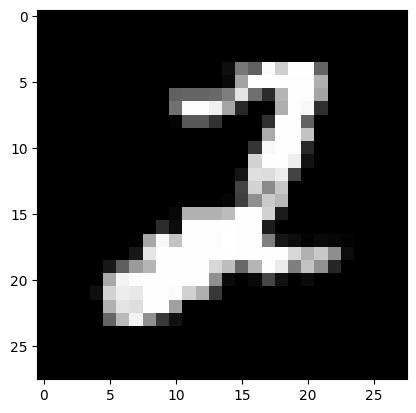

Prediction:  [4]
Label:  4


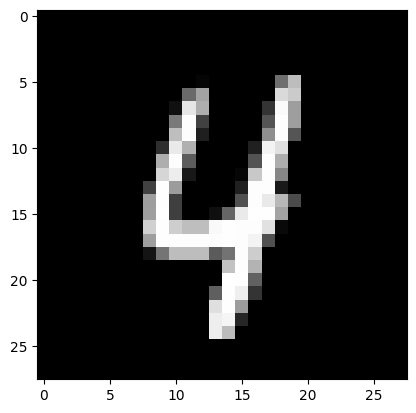

In [160]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)

In [159]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 2 2 4 1 5 2 2 4 4 0 5 2 2 1 5 7 7 4 4 8 4 7 2 4 4 1 4 7 2 5 8 2 4 4 0 1
 3 4 4 4 4 4 7 7 1 4 2 2 4 1 0 1 0 7 2 1 1 4 1 0 1 9 4 7 0 5 7 1 8 2 4 1 1
 2 0 5 4 2 2 0 5 1 1 2 4 4 3 3 4 5 1 9 0 3 0 9 2 3 8 4 4 1 8 4 9 3 4 3 5 2
 9 2 8 0 0 8 3 8 4 5 2 4 0 4 7 0 2 0 7 1 4 7 1 3 2 2 0 3 7 4 1 2 1 7 4 4 1
 4 2 3 8 4 1 3 1 4 0 4 4 2 8 7 2 2 1 3 0 4 2 5 0 2 1 2 1 2 9 7 2 1 1 4 5 2
 5 1 0 1 4 1 1 7 3 1 5 3 1 2 2 4 4 1 7 4 3 4 4 5 3 0 4 4 1 7 4 4 3 4 5 0 1
 2 7 0 8 7 1 9 7 4 3 7 1 8 3 3 1 0 5 4 8 0 7 7 1 2 2 3 1 1 4 7 0 3 8 2 7 1
 1 5 1 3 4 1 7 3 2 6 6 0 8 0 8 5 1 5 1 1 4 4 0 5 2 2 0 3 4 3 2 8 4 4 4 3 8
 4 0 3 1 2 1 7 8 7 4 0 4 4 4 3 4 7 2 3 2 2 2 3 4 2 2 7 4 2 7 7 5 7 4 5 8 5
 1 4 7 3 5 1 4 2 1 3 2 5 4 3 3 2 3 7 4 0 1 4 2 1 2 1 0 4 9 4 4 2 4 1 7 0 4
 1 4 0 1 5 1 9 4 1 0 2 8 3 7 2 8 5 3 1 4 1 7 4 3 4 2 4 1 4 3 2 3 5 2 8 3 2
 7 0 0 3 8 4 4 5 0 4 9 3 7 8 2 5 0 8 0 7 1 7 4 0 4 0 3 4 4 2 1 1 1 0 1 0 8
 3 1 0 4 7 7 9 9 1 0 1 2 0 4 1 2 3 7 2 0 9 5 1 0 5 5 7 4 2 7 8 7 5 4 2 0 1
 1 4 2 7 2 1 4 5 2 4 5 0 

C:\Users\hp\AppData\Local\Temp\ipykernel_10684\3364100067.py:5: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / sum(np.exp(Z))
C:\Users\hp\AppData\Local\Temp\ipykernel_10684\3364100067.py:5: RuntimeWarning: invalid value encountered in divide
  A = np.exp(Z) / sum(np.exp(Z))


0.615